In [13]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import trapezoid, simpson, romberg, quad
import scipy.integrate as spi
import scipy.special as sps

# Laboratorio 06: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Leonardo Ortega Trujillo
*Métodos computacionales 2024-II*

---

#1

Usando los métodos trapezoidal, Simpson y cuadratura encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

#Metodos:
##Trapezoid:
$$
\int_a^b f(x) \, dx \approx \frac{h}{2} \left[ f(a) + 2 \sum_{i=1}^{n-1} f(x_i) + f(b) \right] -\frac{h^3}{12}f''(\xi)
$$

##Simpson:
$$
\int_a^b f(x) \, dx \approx \frac{h}{3} \left[ f(a) + 4 \sum_{\text{impares}} f(x_i) + 2 \sum_{\text{pares}} f(x_i) + f(b) \right] -\frac{h^5}{90}f^{(4)}(\xi)
$$

In [2]:
#Aquí va su código
#primera integral
a,b = 1e-100, np.pi/2 #se usa un valor cercano a 0 para que no se encuentre con errores
f = lambda x: 1 / np.sqrt(np.tan(x))
x = np.linspace(a,b,100)

integral1_trap = trapezoid(f(x),x)
integral1_simp = simpson(f(x), x=x)
integral1_quad = quad(f,a,b)

#errores
x = sp.symbols('x')

f = 1 / sp.sqrt(sp.tan(x))
fp2 = sp.diff(f,x,2)
fp4 = sp.diff(f,x,4)
fp2_fun = sp.lambdify(x,fp2,'numpy')
fp4_fun = sp.lambdify(x,fp4,'numpy')
h = (b-a)/100
epsilon = (b-a)/2

error_trap = (h**3 / 12)*fp2_fun(epsilon)
error_simp = (h**5 / 90)*fp4_fun(epsilon)

print(f'La integral usando los 3 diferentes metodos y sus errores son:\n\nTrapezoid: {integral1_trap}, error: {error_trap}\nSimpson: {integral1_simp}, error: {error_simp}\nQuad: {integral1_quad[0]}, error: {integral1_quad[1]}')

La integral usando los 3 diferentes metodos y sus errores son:

Trapezoid: 7.933314781792407e+47, error: 3.2298204875312337e-07
Simpson: 5.288876521194939e+47, error: 1.8063661949131212e-10
Quad: 2.2214414690792026, error: 4.1406478246130973e-10


In [3]:
#segunda integral
c,d = 1, 1e+50
g = lambda x: np.cos(x) / x**3
x_ = np.linspace(c,d,100)

integral2_trap = trapezoid(g(x_),x_)
integral2_simp = simpson(g(x_), x=x_)
integral2_quad = quad(g,c,d)

#errores
x = sp.symbols('x')

g = sp.cos(x) / x**3
gp2 = sp.diff(g,x,2)
gp4 = sp.diff(g,x,4)
gp2_fun = sp.lambdify(x,gp2,'numpy')
gp4_fun = sp.lambdify(x,gp4,'numpy')

h = (d-c)/100
epsilon = (d-c)/2

error2_trap = (h**3 / 12)*gp2_fun(epsilon)
error2_simp = (h**5 / 90)*gp4_fun(epsilon)

print(f'La integral usando los 3 diferentes metodos y sus errores son:\n\nTrapezoid: {integral2_trap}, error: {error2_trap}\nSimpson: {integral2_simp}, error: {error2_simp}\nQuad: {integral2_quad[0]}, error: {integral2_quad[1]}')

La integral usando los 3 diferentes metodos y sus errores son:

Trapezoid: 2.728799524586565e+47, error: -6.45840476984935e-07
Simpson: 1.8191996830577098e+47, error: 8.611206359799135e+88
Quad: 2.3101738648906532e-94, error: 4.537354386600277e-94


##ultima integral
$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$


In [7]:
#tercera integral
a_,b_,c_ = 0,np.pi/4,0
seno = lambda x: np.sin(x)

f = lambda x,y: 1 / np.sqrt(1-y**2)

def integral_y(x):
  return quad(lambda y: f(x,y),c,d)[0]

integral_xy, error = quad(integral_y,a,b)
integral_xy

<ipython-input-7-ed9c0e7bd0e6>:5: RuntimeWarning: invalid value encountered in sqrt
  f = lambda x,y: 1 / np.sqrt(1-y**2)
<ipython-input-7-ed9c0e7bd0e6>:8: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(lambda y: f(x,y),c,d)[0]
<ipython-input-7-ed9c0e7bd0e6>:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_xy, error = quad(integral_y,a,b)


nan

#2

El trabajo realizado sobre un objeto es igual a la fuerza por la distancia recorrida en la dirección de la fuerza. Se la velocidad de un objeto en la dirección $x$

\begin{eqnarray}
v_x = 4t && 0\leq t\leq 5\\
v_x = 20 + (5-t)^2  && 5\leq t\leq 15
\end{eqnarray}

donde $v_x$ está en m/s.

* Realice un gráfico de la distancia $x$ que recorre el objeto en función del tiempo.

* Calcule el valor del trabajo para una fuerza constante $F_x$ de 200 N para todo $t$.



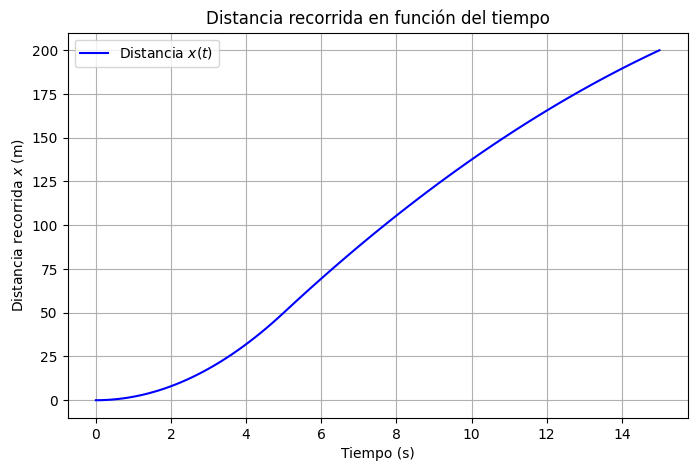


El trabajo total realizado es W = 40000.00 J


In [10]:
#Aquí va su código
def vx(t):
    if 0 <= t <= 5:
        return 4 * t
    elif 5 < t <= 15:
        return 20 + (5 - t)
    else:
        return 0

t_values = np.linspace(0, 15, 100)
vx_values = np.array([vx(t) for t in t_values])

#integramos la velocidad para obtener la distancia x(t)
def x_t(t):
    return quad(vx, 0, t)[0]

x_values = np.array([x_t(t) for t in t_values])

#el trabajo realizado: W = integral(F) dx
F_x = 200  #constante
W_total = F_x * x_t(15)

plt.figure(figsize=(8, 5))
plt.plot(t_values, x_values, label="Distancia $x(t)$", color="b")
plt.xlabel("Tiempo (s)")
plt.ylabel("Distancia recorrida $x$ (m)")
plt.title("Distancia recorrida en función del tiempo")
plt.legend()
plt.grid()
plt.show()

# Mostrar el resultado del trabajo
print(f"\nEl trabajo total realizado es W = {W_total:.2f} J")

#3
La cantidad de masa transportada por una tuberia durante un periodo se puede calcular como

$$M = \int_{t_1}^{t_2} Q(t) c(t) \; dt$$

siendo M (masa en mg), $Q(t)$ el caudal y $c(t)$ concentración (mg/m$^3$). Sean las siguientes representaciones funcionales:

$$Q(t) = 9 + 5 \cos^2 (0.4t)$$
$$c(t) = 5e^{-0.5 t} + 2 e^{0.15 t}$$

Determine la masa transportada entre $t_1 = 2$ y $t_2 = 8 \mbox{ min}$ usando:

* Haga un gráfico del flujo y la concentración en función del tiempo.
* Determine el valor de la integral usando el método de integración de Romberg
* Compruebe sus resultado usando el método de cuadratura Gaussiana adaptativa `quad`.


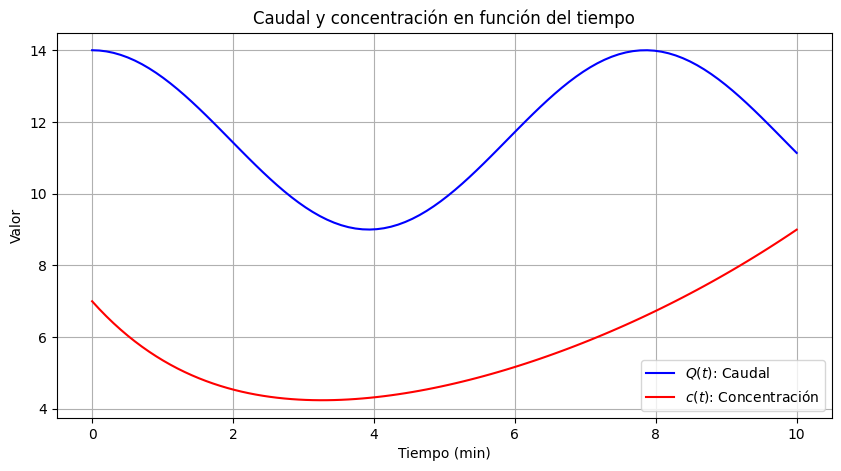

Masa transportada (Método de Romberg): 335.9625 mg
Masa transportada (Método de Quad): 335.9625 mg (Error estimado: 3.73e-12)


<ipython-input-14-f4a879571786>:31: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  M_romberg = romberg(integrand, t1, t2)


In [14]:
#Aquí va su código
#funciones
def Q(t):
    return 9 + 5 * np.cos(0.4 * t) ** 2

def c(t):
    return 5 * np.exp(-0.5 * t) + 2 * np.exp(0.15 * t)

def integrand(t):
    return Q(t) * c(t)

#limites de integracion
t1, t2 = 2, 8

#gráfica de Q(t) y c(t)
t_values = np.linspace(0, 10, 100)  # Rango amplio para visualizar
Q_values = Q(t_values)
c_values = c(t_values)

plt.figure(figsize=(10, 5))
plt.plot(t_values, Q_values, label='$Q(t)$: Caudal', color='b')
plt.plot(t_values, c_values, label='$c(t)$: Concentración', color='r')
plt.xlabel('Tiempo (min)')
plt.ylabel('Valor')
plt.title('Caudal y concentración en función del tiempo')
plt.legend()
plt.grid()
plt.show()

#calcular la integral con el método de Romberg
M_romberg = romberg(integrand, t1, t2)

#calcular la integral con el método de quad
M_quad, error = quad(integrand, t1, t2)

print(f"Masa transportada (Método de Romberg): {M_romberg:.4f} mg")
print(f"Masa transportada (Método de Quad): {M_quad:.4f} mg (Error estimado: {error:.2e})")


#4
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

In [16]:
#Aquí va su código
#cond. iniciales
I0 = 0.1   # Momento de inercia (kg·m²)
m = 1.0    # Masa (kg)
g = 9.81   # Gravedad (m/s²)
b = 0.2    # Distancia al eje de rotación (m)
theta0 = np.radians(30)  # Ángulo máximo en radianes

#periodo
P0 = 2 * np.pi * np.sqrt(I0 / (m * g * b))

#k para laintegral
k = np.sin(theta0 / 2)

#funcion a integrar
def integrand(phi):
    return 1 / np.sqrt(1 - k**2 * np.sin(phi)**2)

integral_num, error = spi.quad(integrand, 0, np.pi / 2)


P_numeric = (2 * P0 / np.pi) * integral_num

#comparacion
K_exact = sps.ellipk(k**2)
P_exact = (2 * P0 / np.pi) * K_exact

print(f"Periodo con integración numérica: {P_numeric:.6f} s")
print(f"Periodo usando la función de SciPy (exacto): {P_exact:.6f} s")
print(f"Error estimado en la integración numérica: {error:.2e}")


Periodo con integración numérica: 1.443198 s
Periodo usando la función de SciPy (exacto): 1.443198 s
Error estimado en la integración numérica: 1.77e-14


#5
El departamento de transporte encuentra que la tasa a la cual los autos cruzan un puente puede ser aproximada por la función:



$$ f(t) = \frac{22.8}{3.5 + 7(t - 1.25)^4} $$



donde $t = 0 $ a las 4 pm, y se mide en horas, y $ f(t) $ se mide en autos por minuto. Estima el número total de autos que cruzan el puente entre las 4 y las 6 pm. Asegúrate de que tu estimación tenga un error menor al 5% y proporciona evidencia matemática suficiente de tu estimación de error.


In [21]:
#Aquí va su código
#funcion de flujo de carros
def f(t):
    return 22.8 / (3.5 + 7 * (t - 1.25)**4)

#límites de integracion
t1, t2 = 0, 2

#metodo Romberg
N_romberg = spi.romberg(f, t1, t2, tol=1e-5)

#metodo quad
N_quad, error_quad = spi.quad(f, t1, t2)

#error relativo
error_relativo = abs(N_romberg - N_quad) / N_quad * 100

# conversion
N_romberg *= 60
N_quad *= 60

print(f"Autos estimados con Romberg: {N_romberg:.2f}")
print(f"Autos estimados con Quad: {N_quad:.2f}")
print(f"Error estimado en Quad: {error_quad * 60:.2f}")
print(f"Error relativo entre métodos: {error_relativo:.4f}%")

# Verificación del 5%
if error_relativo < 5:
    print(" La estimación cumple con el criterio de error menor al 5%.")
else:
    print("La estimación puede no ser suficientemente precisa.")


Autos estimados con Romberg: 599.51
Autos estimados con Quad: 599.51
Error estimado en Quad: 0.00
Error relativo entre métodos: 0.0000%
 La estimación cumple con el criterio de error menor al 5%.


<ipython-input-21-0eb73ce99af7>:10: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  N_romberg = spi.romberg(f, t1, t2, tol=1e-5)


#6
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo. Para $a$ = 1, $I$ = 3, y $μ0∕4π$ = 1, calcular y graficar:

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


<ipython-input-24-9b4bb26de487>:12: RuntimeWarning: invalid value encountered in scalar divide
  term = ((2 - k2) * K_k - 2 * E_k) / k2


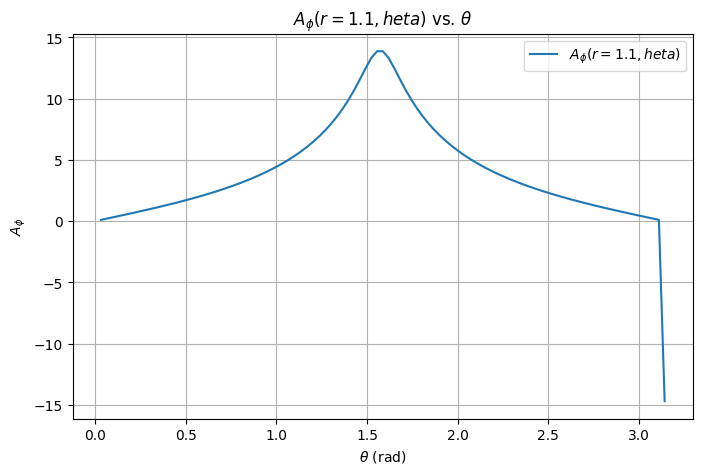

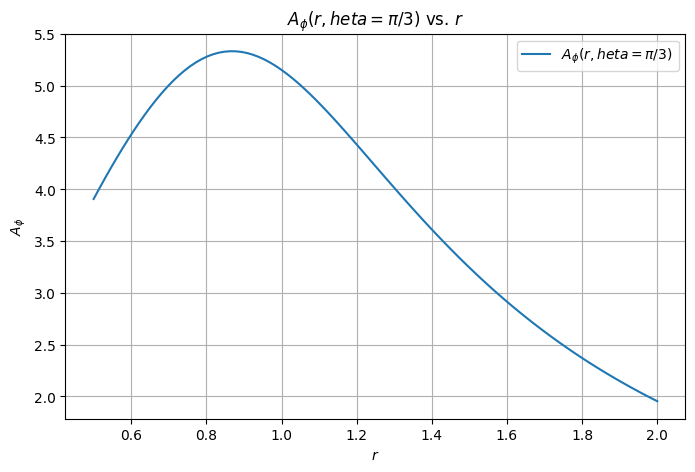

In [24]:
#Aquí va su código
def k_squared(a, r, theta):
    return (4 * a * r * np.sin(theta)) / (a**2 + r**2 + 2 * a * r * np.sin(theta))

def A_phi(a, I, r, theta, mu0_4pi=1):
    k2 = k_squared(a, r, theta)
    k = np.sqrt(k2)
    K_k = sps.ellipk(k2)
    E_k = sps.ellipe(k2)

    factor = (4 * I * a) / np.sqrt(a**2 + r**2 + 2 * a * r * np.sin(theta))
    term = ((2 - k2) * K_k - 2 * E_k) / k2

    return mu0_4pi * factor * term

a = 1
I = 3

# (a) A_phi vs. θ para r = 1.1
theta_values = np.linspace(0, np.pi, 100)
A_phi_theta = [A_phi(a, I, 1.1, theta) for theta in theta_values]

plt.figure(figsize=(8, 5))
plt.plot(theta_values, A_phi_theta, label=r'$A_{\phi}(r=1.1, 	heta)$')
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel(r'$A_{\phi}$')
plt.title(r'$A_{\phi}(r=1.1, 	heta)$ vs. $\theta$')
plt.legend()
plt.grid()
plt.show()

# (b) A_phi vs. r para θ = π/3
r_values = np.linspace(0.5, 2, 100)
A_phi_r = [A_phi(a, I, r, np.pi/3) for r in r_values]

plt.figure(figsize=(8, 5))
plt.plot(r_values, A_phi_r, label=r'$A_{\phi}(r, 	heta=\pi/3)$')
plt.xlabel(r'$r$')
plt.ylabel(r'$A_{\phi}$')
plt.title(r'$A_{\phi}(r, 	heta=\pi/3)$ vs. $r$')
plt.legend()
plt.grid()
plt.show()